In [3]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
## Tokenization
myfile = open('historic_events_contents.txt', encoding='utf-8')

In [7]:
# Import txt file
with open('historic_events_contents.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\\n', '')

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Tokenization

In [12]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Historic Key Events\n"The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Historic events in the 20th century[edit]\nThe world at the beginning of the century[edit]\nMain article: Edwardian era\nThe new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', 'From 1914 to 1918, the First World War, and its aftermath, caused major changes in the power balance of the world, destroying or transforming some of the most powerful empires.', '""The war to end all wars"": World War I (1914â€“1918)[edit]\nMain article: World War I\nArrest of 

In [14]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Historic', 'Key', 'Events', "''", 'The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'era', 'The', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 

In [16]:
# Checking frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4700 samples and 21291 outcomes>


In [18]:
# Get the 10 most common words
common_words = dist_words.most_common(10)

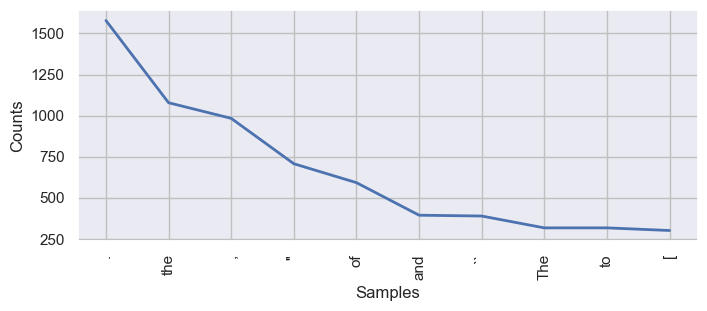

In [20]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

# Remove Stop Words

In [23]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'o', 'it', 'which', 'if', 'so', "mustn't", 'as', 'shan', 'these', "isn't", 'up', "should've", 'weren', 're', 'itself', "she's", 'ours', 'those', 'shouldn', 'other', 'does', 'couldn', 'am', "you've", 'me', 'the', 'yourself', 'myself', 'you', 'under', 'only', 'down', 'themselves', 'but', 'this', 'd', 'few', 'same', 'by', "needn't", 'whom', 'nor', 'hadn', 'with', 'while', "that'll", 'on', "hadn't", 'had', 'there', 'hers', "shan't", 'aren', "you'll", 'don', 'who', "don't", 'such', 'where', 'doesn', 'is', 'into', 'been', 'some', 'ma', 'yourselves', 'no', 'herself', 'than', 'ain', 'any', 'once', 'now', 'yours', 'isn', 'then', "hasn't", "couldn't", 'being', 'how', 'about', 'through', 'him', 'a', 'between', 'and', 'for', 'after', 'or', 'off', 'he', 'too', 'of', 'when', 'at', 'has', 'theirs', 'above', 'be', 'she', 'during', 'have', 'its', "won't", 'their', 'haven', "it's", "doesn't", 'them', 'his', 'most', 'own', 'further', 'not', 'we', 'in', 'wouldn', 'himself', 'before', 'why', 'mightn', 'he

In [25]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [27]:
filtered_words

['Historic',
 'Key',
 'Events',
 "''",
 'The',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today',
 '.',
 'Historic',
 'events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'The',
 'world',
 'beginning',
 'century',
 '[',
 'edit',
 ']',
 'Main',
 'article',
 ':',
 'Edwardian',
 'era',
 'The',
 'new',
 'beginning',
 '20th',
 'century',
 'marked',
 'significant',
 'changes',
 '.',
 'The',
 '1900s',
 'saw',
 'decade',
 'herald',
 'series',
 'inventions',
 ',',
 'including',
 'automobile',
 ',',
 'airplane',
 'radio',
 'broadcasting',
 '.',
 'From',
 '1914',
 '1918',
 ',',
 'First',
 'World'

In [29]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4597 samples and 16699 outcomes>


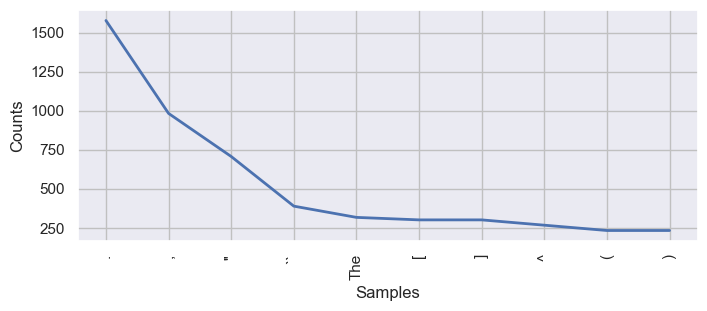

In [31]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [33]:
dist_words_filter

FreqDist({'.': 1579, ',': 984, "''": 708, '``': 390, 'The': 318, '[': 302, ']': 302, '^': 268, '(': 234, ')': 234, ...})

In [35]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [37]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Historic', 'Key', 'Events', 'The', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'The', 'world', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'The', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'From', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'edit', 'Main', 'article'

In [39]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

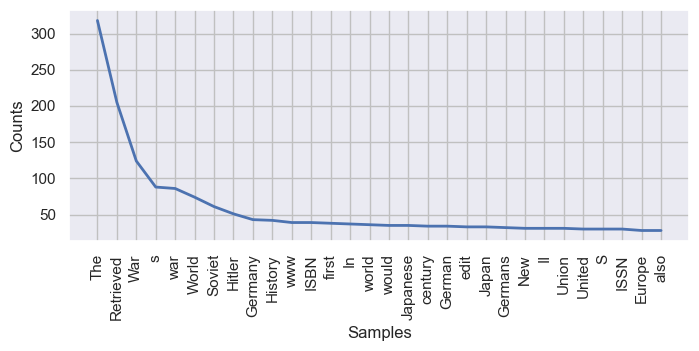

In [41]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

## Before and after removing stopwords/punctuation
#### The results of the text mining are far more useful and telling after removing stopwords and punctuation. More discernible words, such as proper pronouns and names of countries that were notorious for their involvement in various wars, now appear

## POS Tags list with textblob

In [47]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [49]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [51]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 13 ms


In [53]:
text

TextBlob("['Historic', 'Key', 'Events', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'world', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'From', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'war', 'end', 'wars', 'World', 'War', 'I', 'edit', 'Main', 'article', 'World', 'War', 'I', 'Arrest', 'sus

In [55]:
tags_list = text.tags

In [57]:
tags_list

[('[', 'JJ'),
 ("'Historic", 'NNP'),
 ("'", 'POS'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'Events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'changed", 'VBD'),
 ("'world", 'NNP'),
 ("'", 'POS'),
 ("'unprecedented", 'VBD'),
 ("'ways", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wars", 'NNS'),
 ("'", 'POS'),
 ("'sparked", 'VBD'),
 ("'tension", 'NNP'),
 ("'", 'POS'),
 ("'countries", 'NNS'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'creation", 'NNP'),
 ("'", 'POS'),
 ("'atomic", 'NNP'),
 ("'", 'POS'),
 ("'War", 'NNP'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'Space", 'NNP'),
 ("'", 'POS'),
 ("'Race", 'NNP'),
 ("'", 'POS'),
 ("'creation", 'NN'),
 ("'space", 'NNP'),
 ("'", 'POS'),
 ("'based", 'VBD'),
 ("'rockets", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wide", 'NNP'),
 ("'", 'POS'),
 ("'Web", 'NNP'),
 ("'", 'POS'),
 ("'created", 'VBD'),
 ("'These", 'JJ'),
 ("'advancements", 'NNS'),
 ("'", 'POS'),
 ("'significa

In [59]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [61]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Historic,NNP
2,',POS
3,'Key,NNP
4,',POS


In [63]:
df_t = df_text.groupby('Word type').count().reset_index()

In [65]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,73
2,DT,14
3,EX,12
4,FW,42


In [67]:
top20 = df_t.nlargest(20, 'Words')

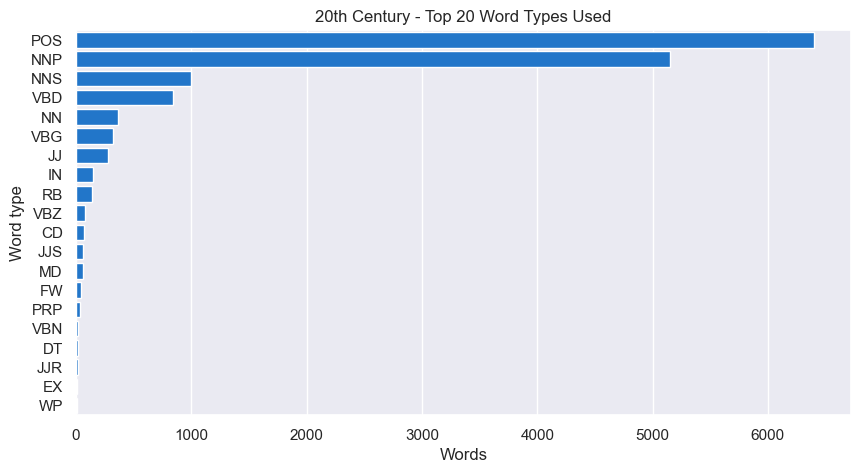

In [77]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x="Words", y="Word type", data=top20, palette=["#1976D2"], saturation=0.9)
    plt.title("20th Century - Top 20 Word Types Used")
plt.show()

## Three bar plots for nouns, verbs and adjectives

In [82]:
def word_analysis(word_type):
    filtered = [row for row in my_list if str(word_type) in row[1]]
    print("filtered for " + word_type)
    df = pd.DataFrame(filtered)
    df.columns = ["Word", "Occurences"]
    x=df.groupby('Word').count().reset_index()
    y=x.sort_values(by=['Occurences'], ascending=False)
    top10=y.nlargest(10, 'Occurences')
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")
    plt.show()

## Nouns

In [88]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10_n = y.nlargest(10, 'Occurences')

In [90]:
top10_n

,Word,Occurences
1212,'War,124
2479,'war,86
1255,'World,74
1068,'Soviet,61
515,'Hitler,51
514,'History,42
2511,'www,39
537,'ISBN,39
1708,'first,38
548,'In,37


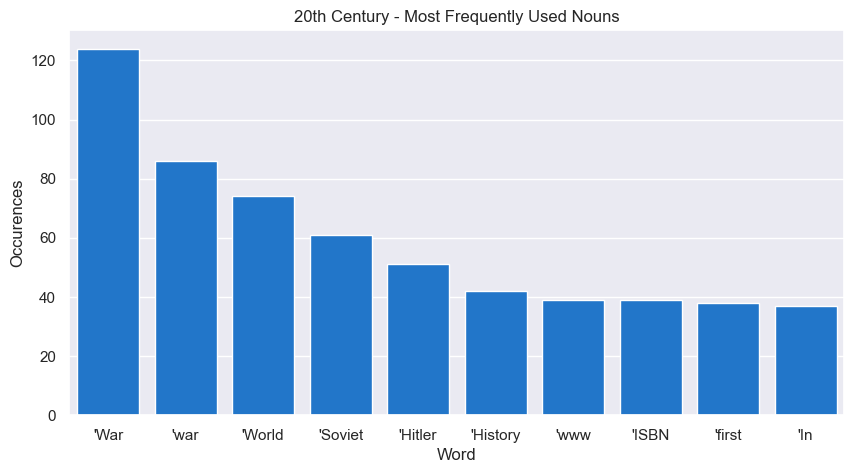

In [94]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences", palette=["#1976D2"],
    saturation=0.9, data = top10_n).set_title("20th Century - Most Frequently Used Nouns")

In [96]:
# Save the figure top_nouns
plt.savefig('top_nouns.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## Verbs

In [99]:
df_v = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df_v.columns = ["Word", "Occurences"]
x = df_v.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10_v = y.nlargest(10, 'Occurences')

In [101]:
top10_v

,Word,Occurences
26,'Retrieved,205
35,'United,30
0,'Allied,18
193,'led,15
310,'used,13
191,'launched,12
1,'Archived,10
92,'controlled,9
159,'forced,8
302,'turned,7


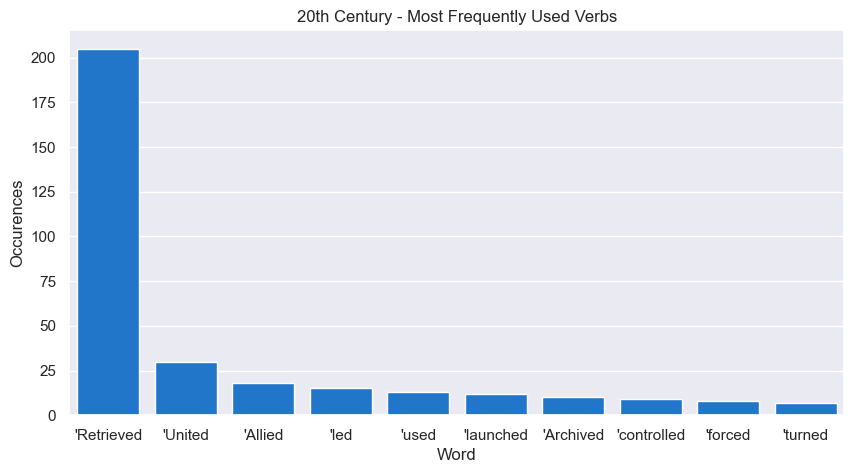

In [103]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences", palette=["#1976D2"],
    saturation = 0.9, data = top10_v).set_title("20th Century - Most Frequently Used Verbs")

In [105]:
# Save the figure top_verbs
plt.savefig('top_verbs.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## Adjectives

In [108]:
df_a = df_text[df_text['Word type'] == "JJ"]
df_a.columns = ["Word", "Occurences"]
x = df_a.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10_a = y.nlargest(10, 'Occurences')

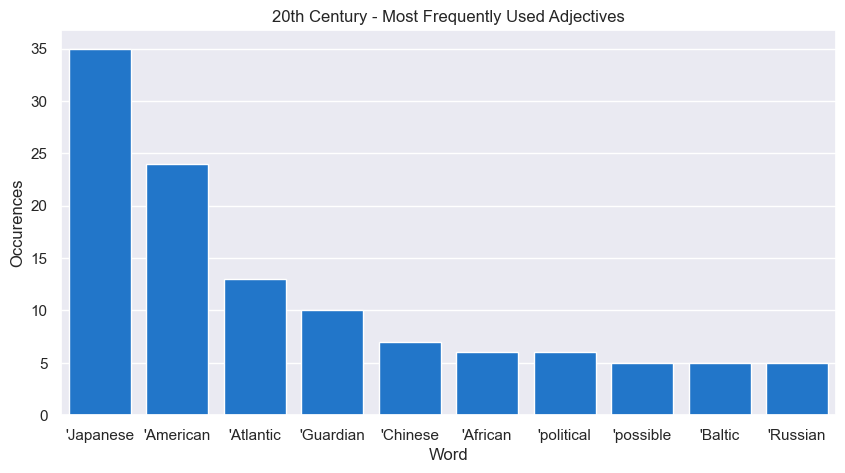

In [110]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences", palette=["#1976D2"],
    saturation=0.9, data=top10_a).set_title("20th Century - Most Frequently Used Adjectives")

In [112]:
# Save the figure top_adj
plt.savefig('top_adj.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## Frequency Each Country is Mentioned

In [115]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Historic Key Events th century changed world unprecedented ways World Wars sparked tension countries led creation atomic bombs Cold War led Space Race creation space based rockets World Wide Web created These advancements played significant role citizens lives shaped st century today Historic events th century edit world beginning century edit Main article Edwardian era new beginning th century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting From First World War aftermath caused major changes power balance world destroying transforming powerful empires war end wars World War I edit Main article World War I Arrest suspect Sarajevo following Assassination Archduke Franz Ferdinand First World War simply WWI termed Great War contemporaries started ended war extension century whole ignited Assassination Sarajevo Austro Hungarian Empire heir throne Erzherzog Franz Ferdinand Gavrilo Princip organization Young Bosnia Bosnian Serbs

In [117]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [119]:
all_counts

Counter({'Retrieved': 205,
         'War': 124,
         'war': 86,
         'World': 74,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 43,
         'History': 42,
         'www': 39,
         'ISBN': 39,
         'first': 38,
         'In': 37,
         'world': 36,
         'would': 35,
         'Japanese': 35,
         'century': 34,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'II': 31,
         'Union': 31,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 28,
         'also': 28,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'th': 25,
         'Battle': 25,
         'American': 24,
         'weapons': 24,
         'This': 23,
         'attack': 23,
         'new': 22,
         'history': 22,
         'Stalin': 21,
         'Holocaust': 21,
         'Africa': 21,
       

In [121]:
countries = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [123]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [125]:
countries['country_name'] = countries['country_name'].str.strip()

In [127]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [129]:
# Replace names with aliases

countries['country_name'] = countries['country_name'].replace('United States','USA')
countries['country_name'] = countries['country_name'].replace('United States of America','USA')
countries['country_name'] = countries['country_name'].replace('America','USA')
countries['country_name'] = countries['country_name'].replace('U.S.','USA')
countries['country_name'] = countries['country_name'].replace('United Kingdom','UK')
countries['country_name'] = countries['country_name'].replace('Great Britain','UK')
countries['country_name'] = countries['country_name'].replace('Britain','UK')

In [131]:
countries['country_alias'] = countries['country_name'].apply(lambda x: x.rsplit(' ', 1)[-1])

In [133]:
countries_list = countries['country_alias'].to_list()

In [135]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [137]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Verde': 1,
 'Republic': 4,
 'Chad': 0,
 'Chile': 0,
 'of': 0,
 'Colombia': 0,
 'Comoros': 0,
 'the': 2,
 'Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Timor': 1,
 'Ecuador': 0,
 'Egypt': 2,
 'Salvador': 0,
 'Guinea': 4,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethiopia': 0,
 'Fiji': 0,
 'Finland': 4,
 'France': 16,
 'Gabon': 0,
 'Georgia': 0,
 'Germany': 43,
 'Ghana': 1,
 'Greece': 4,
 'Grenada': 0,
 'Guatemala': 0,
 'Bissau': 1,
 'Guyana': 0,
 'Haiti': 0,
 '

In [139]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [141]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Barbuda,Argentina,Armenia,Australia,Austria,...,Zambia,Zimbabwe,Abkhazia,Artsakh,Kosovo,Niue,Somaliland,Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df = df.transpose().reset_index()

In [145]:
df.dtypes

index    object
0         int64
dtype: object

In [147]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
189,Niue,0
190,Somaliland,0
191,Ossetia,0
192,Taiwan,0


In [149]:
df.rename(columns = {"index":"country_name", 0:"Times mentioned"}, inplace = True)

In [151]:
df

,country_name,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
189,Niue,0
190,Somaliland,0
191,Ossetia,0
192,Taiwan,0


In [153]:
df.shape

(194, 2)

In [157]:
# Set the figure size
plt.figure(figsize=(100, 300))

# Create a dark palette with 27 colors
palette = sns.dark_palette("#79C", 27)

# Plotting
with sns.color_palette(palette):
    ax = sns.barplot(
        x="Times mentioned", 
        y="country_name",
        palette=["#1976D2"],
        saturation=0.9, 
        data=df.sort_values("Times mentioned", ascending=False)
    )
    ax.set_title("20th Century - most frequently mentioned countries", fontsize=100)
    ax.set_xlabel("Times mentioned", fontsize=50)
    ax.set_ylabel("Country Name", fontsize=50)

    # Adjust tick label size
    ax.tick_params(axis='x', labelsize=50)
    ax.tick_params(axis='y', labelsize=50)

## Thoughts on the Bar Chart
#### There is still further cleaning to be done. There are some unusable entries in the countries list, such as "States", "Islands" and "North", which could refer to any number of countries or perhaps aren't referring countries at all. I also noticed that countries with two words in the name do not appear as much as I would expect from this graph: countries such as United States and United Kingdom.

## Save Final Bar Chart

In [161]:
# country mentions
plt.savefig('20th_century_countries_mentions.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>